In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['message', 'positive']

In [33]:
df.head()

,message,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [34]:
df.message = df.message.str.lower()

In [35]:
df2 = df
df3 = df
df4 = df
df5 = df

## Iteration 1

In [36]:
keywords = ['great', 'good', 'awesome', 'excellent']

for key in keywords:
    df[str(key)] = df.message.str.contains(
        str(key),
        case=False
    )

In [37]:
df.head()

,message,positive,great,good,awesome,excellent
0,so there is no way for me to plug it in here i...,0,False,False,False,False
1,"good case, excellent value.",1,False,True,False,True
2,great for the jawbone.,1,True,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False
4,the mic is great.,1,True,False,False,False


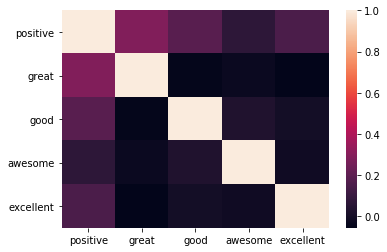

In [38]:
sns.heatmap(df.corr())

In [39]:
data = df[keywords]
target = df['positive']

In [40]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 342


In [41]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.64
Testing on Sample: 0.658


In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.68, 0.7 , 0.7 , 0.7 , 0.65, 0.67, 0.6 , 0.61, 0.68, 0.59])

## Iteration 2

In [43]:
keywords = ['great', 'good', 'awesome', 'excellent', 'love', 'works']

for key in keywords:
    df2[str(key)] = df2.message.str.contains(
        str(key),
        case=False
    )

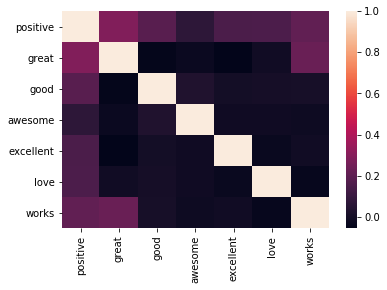

In [44]:
sns.heatmap(df2.corr())

In [45]:
data2 = df2[keywords]
target2 = df2['positive']

In [46]:
# Fit our model to the data.
bnb.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 300


In [47]:
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data2, target2).score(data2, target2)))

With 20% Holdout: 0.68
Testing on Sample: 0.7


In [48]:
cross_val_score(bnb, data2, target2, cv=10)

array([0.74, 0.74, 0.75, 0.76, 0.69, 0.68, 0.64, 0.65, 0.73, 0.62])

## Iteration 3

In [49]:
keywords = ['great', 'good', 'awesome', 'excellent', 'love', 'works', 'flawless', 'impressed', 'satisfied']

for key in keywords:
    df3[str(key)] = df3.message.str.contains(
        str(key),
        case=False
    )

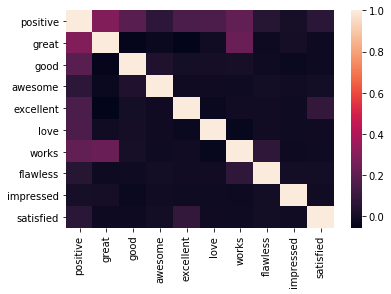

In [50]:
sns.heatmap(df3.corr())

In [51]:
data3 = df3[keywords]
target3 = df3['positive']

In [52]:
# Fit our model to the data.
bnb.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = bnb.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))

Number of mislabeled points out of a total 1000 points : 295


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data3, target3, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data3, target3).score(data3, target3)))

With 20% Holdout: 0.69
Testing on Sample: 0.705


In [54]:
cross_val_score(bnb, data3, target3, cv=10)

array([0.74, 0.74, 0.76, 0.76, 0.69, 0.7 , 0.64, 0.65, 0.74, 0.63])

## Iteration 4

In [55]:
keywords = ['great', 'good', 'awesome', 'excellent', 'love', 'works', 'flawless', 'impressed', 'satisfied', 'well', 'recommend']

for key in keywords:
    df4[str(key)] = df4.message.str.contains(
        str(key),
        case=False
    )

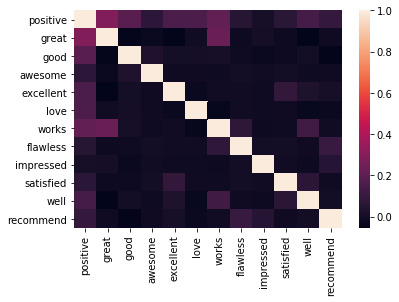

In [56]:
sns.heatmap(df4.corr())

In [57]:
data4 = df4[keywords]
target4 = df4['positive']

In [58]:
# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))

Number of mislabeled points out of a total 1000 points : 271


In [59]:
X_train, X_test, y_train, y_test = train_test_split(data4, target4, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data4, target4).score(data4, target4)))

With 20% Holdout: 0.725
Testing on Sample: 0.729


In [60]:
cross_val_score(bnb, data4, target4, cv=10)

array([0.8 , 0.75, 0.77, 0.76, 0.72, 0.7 , 0.68, 0.68, 0.79, 0.64])

## Iteration 5

In [64]:
# creating a function to reverse the classification logic for 'anti-keywords'
def switchup(a):
    if a == True:
        a = False
    else:
        a = True
    return a
    

In [62]:
keywords = ['great', 'good', 'awesome', 'excellent', 'love', 'works', 'flawless', 'impressed', 'satisfied', 'well', 'recommend']

for key in keywords:
    df5[str(key)] = df5.message.str.contains(
        str(key),
        case=False
    )
    
anti_keywords = ['bad', 'terrible', 'junk', 'useless']

for akey in anti_keywords:
    df5[str(akey)] = df5.message.str.contains(
        str(akey),
        case=False)

In [63]:
# before reversing anti-keyword logic
df5.head()

,message,positive,great,good,awesome,excellent,love,works,flawless,impressed,satisfied,well,recommend,bad,terrible,junk,useless
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"good case, excellent value.",1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
2,great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the mic is great.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
for akey in anti_keywords:
    df5[str(akey)] = df5[str(akey)].apply(switchup)

In [66]:
# after reversing anti-keyword logic
df5.head()

,message,positive,great,good,awesome,excellent,love,works,flawless,impressed,satisfied,well,recommend,bad,terrible,junk,useless
0,so there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,"good case, excellent value.",1,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True
2,great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,the mic is great.,1,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True


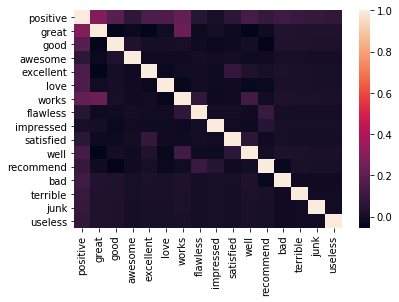

In [67]:
sns.heatmap(df5.corr())

In [71]:
allwords = keywords + anti_keywords

In [72]:
data5 = df5[allwords]
target5 = df5['positive']

In [73]:
data5.head()

,great,good,awesome,excellent,love,works,flawless,impressed,satisfied,well,recommend,bad,terrible,junk,useless
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [74]:
# Fit our model to the data.
bnb.fit(data5, target5)

# Classify, storing the result in a new variable.
y_pred5 = bnb.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))

Number of mislabeled points out of a total 1000 points : 270


In [75]:
X_train, X_test, y_train, y_test = train_test_split(data5, target5, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data5, target5).score(data5, target5)))

With 20% Holdout: 0.725
Testing on Sample: 0.73


In [76]:
cross_val_score(bnb, data5, target5, cv=10)

array([0.8 , 0.75, 0.77, 0.76, 0.73, 0.7 , 0.68, 0.68, 0.79, 0.64])

## Evaluation

For the first 4 iterations I simply added more positive keywords to the model, and this had the desired effect. Each iteration had fewer errors and, although the range of cross validation scores sometimes increased and sometimes decreased from iteration to iteration, these ranges were all very similar. Knowing that this range of cross validation scores didn't increase significantly as we added more keywords tells us that we avoided any major overfitting problems. For these reasons, I fully endorse each iteration up to iteration 4.
<br><br>
For iteration 5 I tried something different, which was to make a list of keywords associated with negative reviews and reverse the classification logic for these words. I was disappointed in the results of this iteration, as it was almost exactly the same as iteration 4 but with added complexity. For this reason I would choose iteration 4, and not iteration 5, as the best sentiment classifier in the group.